# 模拟结果可视化

In [54]:
import os, sys
import pandas as pd 
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from tqdm import tqdm

import scienceplots
plt.style.use(['science', 'nature', 'no-latex', 'notebook'])

this_path = os.path.abspath('.')
if this_path not in sys.path:
    sys.path.append(this_path)

extract_path = os.path.join(this_path, '../../data/extract')

import warnings
warnings.filterwarnings('ignore')


## 1. p+和pi-

In [55]:
ppi_files = os.path.join(extract_path, '*single_p*/*.csv')

ppi_data = []
for ppi_file in glob(ppi_files):
    ppi_data.append(pd.read_csv(ppi_file, index_col=0))

ppi_data = pd.concat(ppi_data)

ppi_data

,particle,material,thickness,p,cos_theta,p_loc,p_loc_err,p_scale,p_scale_err,theta_loc,theta_loc_err,theta_scale,theta_scale_err,efficiency,valid,all,delta_angle_one_sigma
0,single_p+,CsI,3,0.325,0.025,-0.044585,0.000225,0.004504,0.000177,1.058961e-03,0.002301,0.050236,0.001950,0.351484,1078.0,3067.0,0.077721
1,single_p+,CsI,3,0.325,0.075,-0.044672,0.000254,0.004297,0.000204,6.627247e-04,0.002420,0.052240,0.002052,0.356143,1119.0,3142.0,0.077962
2,single_p+,CsI,3,0.325,0.125,-0.044522,0.000270,0.004493,0.000216,1.255261e-03,0.002407,0.051840,0.002040,0.348304,1078.0,3095.0,0.076935
3,single_p+,CsI,3,0.325,0.175,-0.045077,0.000248,0.004102,0.000196,1.937260e-03,0.002424,0.049493,0.002052,0.318063,972.0,3056.0,0.079923
4,single_p+,CsI,3,0.325,0.225,-0.045038,0.000215,0.004084,0.000170,-2.431939e-03,0.002140,0.046057,0.001806,0.324230,1021.0,3149.0,0.077194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,single_pi-,LD,0,1.175,0.675,0.000414,0.000184,0.006367,0.000152,4.423266e-05,0.000046,0.002247,0.000037,0.975138,2471.0,2534.0,0.002994
392,single_pi-,LD,0,1.175,0.725,0.000607,0.000144,0.005879,0.000119,-9.379928e-05,0.000045,0.002190,0.000036,0.974141,2411.0,2475.0,0.003002
393,single_pi-,LD,0,1.175,0.775,0.000838,0.000147,0.005958,0.000121,4.193107e-05,0.000038,0.002093,0.000031,0.974940,2451.0,2514.0,0.002968
394,single_pi-,LD,0,1.175,0.825,0.001005,0.000153,0.006227,0.000125,-1.000457e-05,0.000039,0.002034,0.000032,0.958493,2494.0,2602.0,0.003102


In [56]:
ppi_data['efficiency_err'] = (ppi_data.efficiency * (1-ppi_data.efficiency) / ppi_data['all']) ** 0.5 

In [57]:
ppi_csi_data = ppi_data[ppi_data.material=='CsI']
keys = ['p_scale', 'theta_scale', 'efficiency', 'delta_angle_one_sigma']
titles = ['p_resolution', 'theta_resolution', 'efficiency', 'delta_angle_one_sigma']

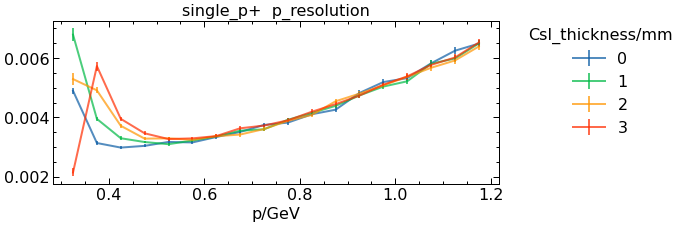

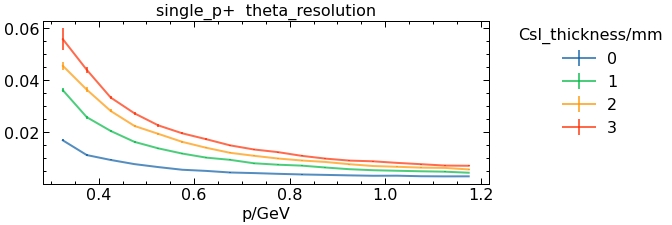

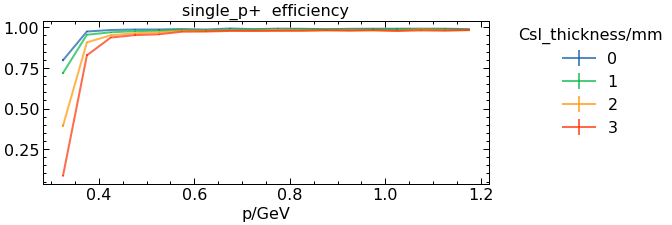

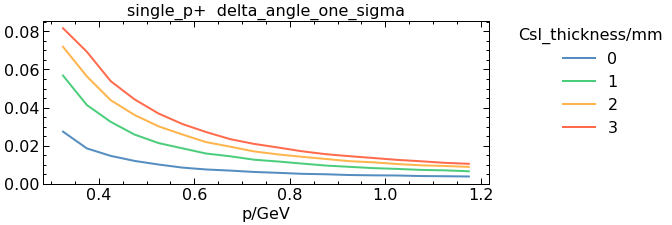

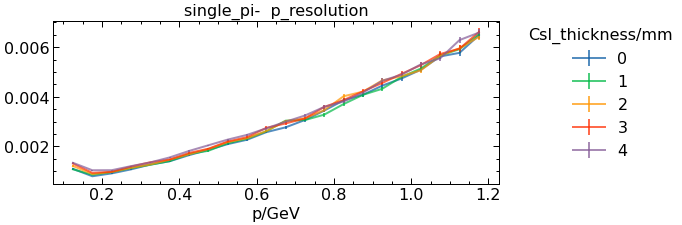

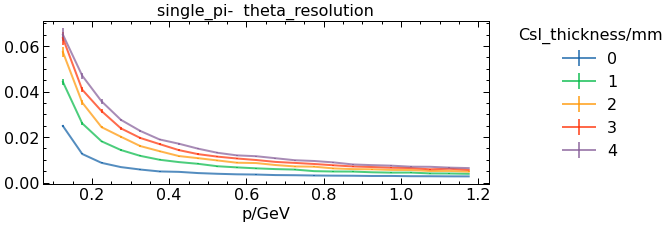

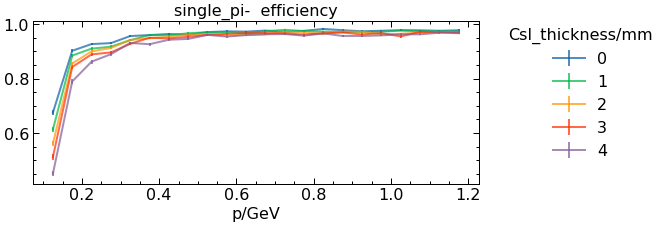

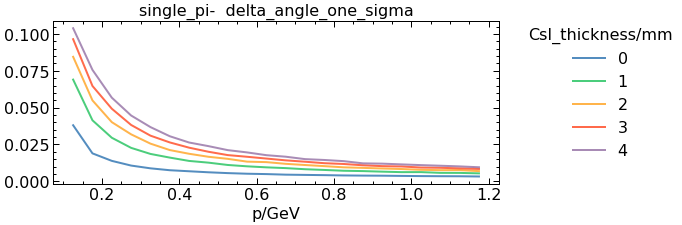

In [58]:
# 动量依赖
ppi_csi_data_fixed_theta = ppi_csi_data[ppi_csi_data.cos_theta==0.525]

for particle in ['single_p+', 'single_pi-']:
    ppi_csi_data_fixed_theta_particle = ppi_csi_data_fixed_theta[
        (ppi_csi_data_fixed_theta.particle==particle) & 
        (ppi_csi_data_fixed_theta.particle==particle)
    ]
    for key,title in zip(keys, titles) :
        # print(particle, key)
        key_err = key + '_err'
        tmp = pd.DataFrame(index=np.sort(ppi_csi_data_fixed_theta_particle.p.unique()))
        tmp_err = tmp.copy()
        tmp.index.name = 'p/GeV'
        for thickness in np.sort(ppi_csi_data_fixed_theta_particle.thickness.unique()):
            tmp_thickness = ppi_csi_data_fixed_theta_particle[
                (ppi_csi_data_fixed_theta_particle.thickness==thickness)
            ].set_index('p').reindex(tmp.index)
            tmp[thickness] = tmp_thickness[key]
            if key_err in ppi_csi_data_fixed_theta_particle.columns:
                tmp_err[thickness] = tmp_thickness[key_err]
            
        tmp.plot(alpha=0.7, style='o-', title='{}  {}'.format(particle, title), figsize=(8,3), yerr=tmp_err)
        plt.legend(loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = 0., title='CsI_thickness/mm')
        plt.show()
            

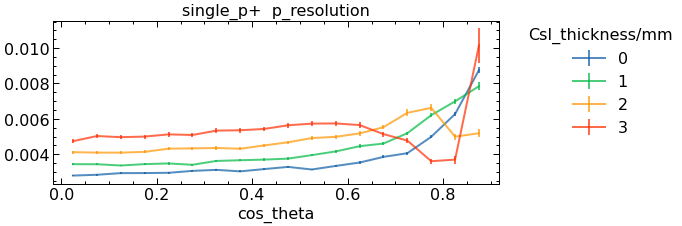

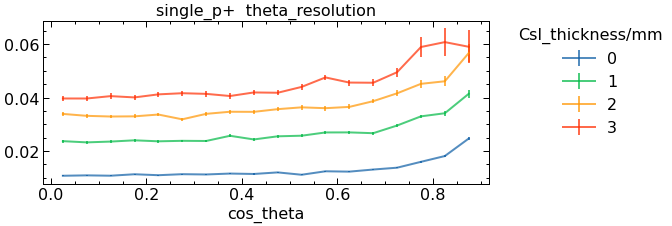

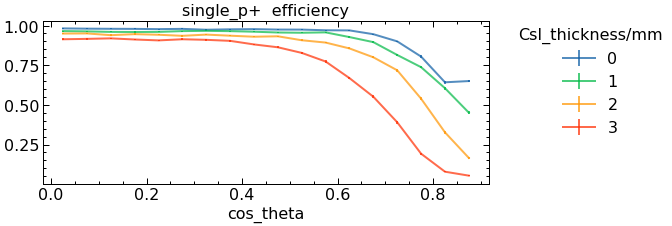

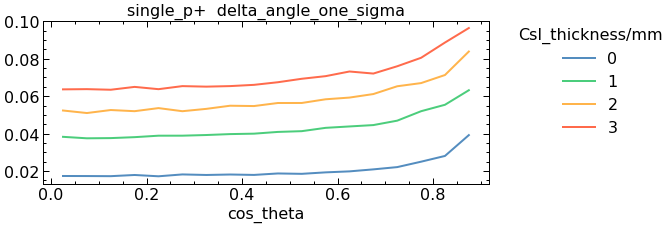

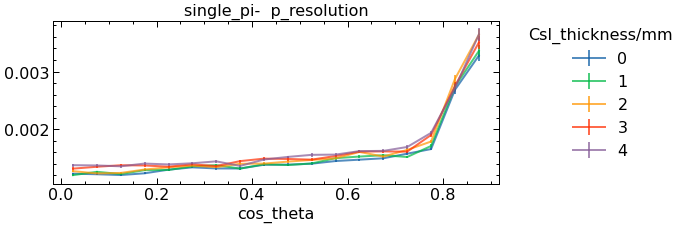

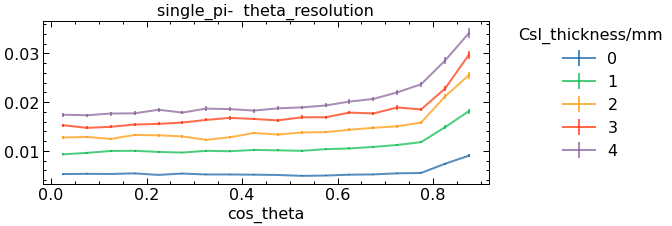

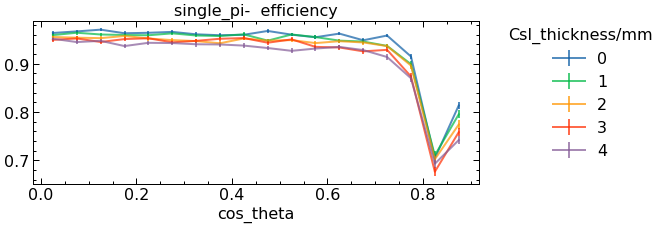

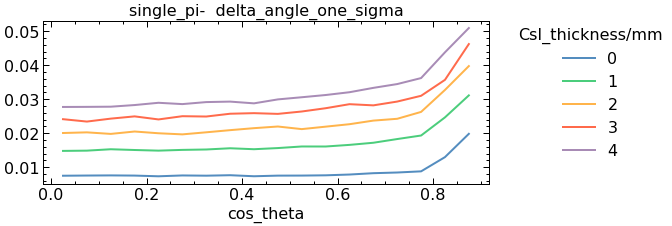

In [59]:
# theta依赖
ppi_csi_data_fixed_p = ppi_csi_data[ppi_csi_data.p==0.375]

for particle in ['single_p+', 'single_pi-']:
    ppi_csi_data_fixed_p_particle = ppi_csi_data_fixed_p[
        (ppi_csi_data_fixed_p.particle==particle) & 
        (ppi_csi_data_fixed_p.particle==particle)
    ]
    for key,title in zip(keys, titles):
        # print(particle, key)
        key_err = key + '_err'
        tmp = pd.DataFrame(index=np.sort(ppi_csi_data_fixed_p_particle.cos_theta.unique()))
        tmp_err = tmp.copy()
        tmp.index.name = 'cos_theta'
        for thickness in np.sort(ppi_csi_data_fixed_p_particle.thickness.unique()):
            tmp_thickness = ppi_csi_data_fixed_p_particle[
                (ppi_csi_data_fixed_p_particle.thickness==thickness)
            ].set_index('cos_theta').reindex(tmp.index)
            tmp[thickness] = tmp_thickness[key]
            if key_err in ppi_csi_data_fixed_p_particle.columns:
                tmp_err[thickness] = tmp_thickness[key_err]

        tmp.plot(alpha=0.7, style='o-', title='{}  {}'.format(particle, title), figsize=(8,3), yerr=tmp_err)
        plt.legend(loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = 0., title='CsI_thickness/mm')
        plt.show()

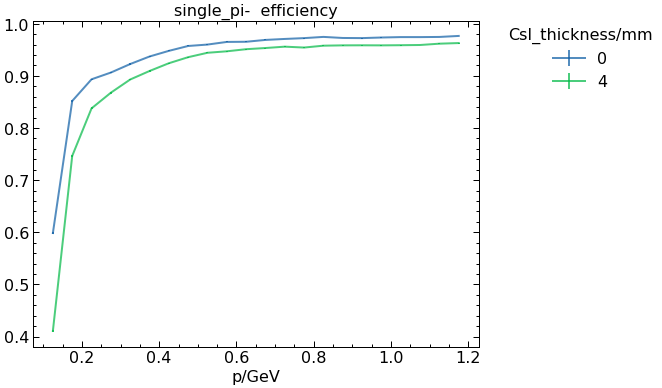

In [60]:
# 动量依赖
ppi_csi_data_pp = ppi_csi_data[ppi_csi_data.particle=='single_pi-']
tmp = pd.DataFrame(index=np.sort(ppi_csi_data_pp.p.unique()))
tmp_err = tmp.copy()
tmp.index.name = 'p/GeV'
tmp.columns.name = 'CsI_thickness'

for thickness in np.sort(ppi_csi_data_pp.thickness.unique()):
    df = ppi_csi_data_pp[
        (ppi_csi_data_pp.thickness==thickness)
    ].groupby('p').sum()
    tmp[thickness] = df.valid / df['all']
    tmp_err[thickness] = (tmp[thickness] * (1-tmp[thickness]) / df['all']) ** 0.5

tmp[[0,4]].plot(alpha=0.7, title='{}  {}'.format('single_pi-', 'efficiency'), figsize=(8,6), yerr=tmp_err)
plt.legend(loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = 0., title='CsI_thickness/mm')
plt.show()

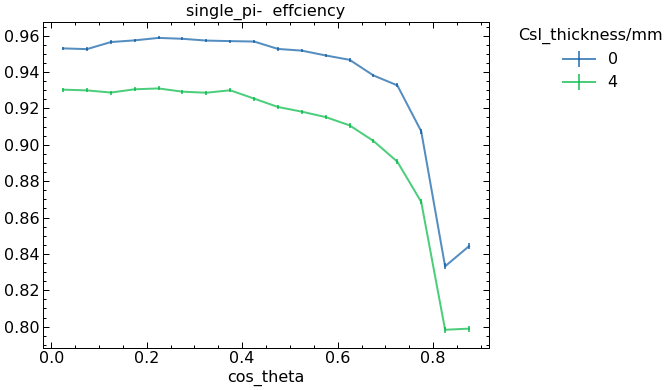

In [61]:
# theta依赖
ppi_csi_data_pp = ppi_csi_data[ppi_csi_data.particle=='single_pi-']
tmp = pd.DataFrame(index=np.sort(ppi_csi_data_pp.cos_theta.unique()))
tmp_err = tmp.copy()
tmp.index.name = 'cos_theta'
tmp.columns.name = 'CsI_thickness'
for thickness in np.sort(ppi_csi_data_pp.thickness.unique()):
    df = ppi_csi_data_pp[
        (ppi_csi_data_pp.thickness==thickness)
    ].groupby('cos_theta').sum()
    tmp[thickness] = df.valid / df['all']
    tmp_err[thickness] = (tmp[thickness] * (1-tmp[thickness]) / df['all']) ** 0.5

tmp[[0,4]].plot(alpha=0.7, style='o-', title='{}  {}'.format('single_pi-', 'effciency'), figsize=(8,6), yerr=tmp_err)
plt.legend(loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = 0., title='CsI_thickness/mm')
plt.show()

[3 4 0 1 2]


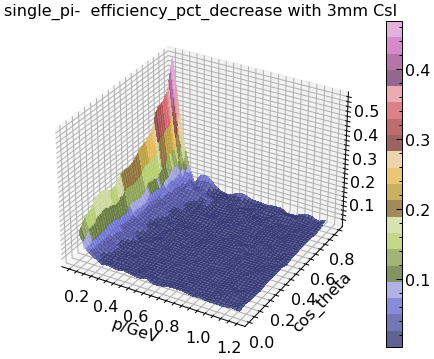

In [62]:
from scipy.interpolate import griddata

particle = 'single_pi-'

ppi_csi_data_pp = ppi_csi_data[ppi_csi_data.particle==particle]

tmp = ppi_csi_data_pp[ppi_csi_data_pp.thickness==0].sort_values(['p', 'cos_theta'])
tmp2 = ppi_csi_data_pp[ppi_csi_data_pp.thickness==3].sort_values(['p', 'cos_theta'])
tmp['efficiency_pct_change'] = 1 - tmp2.efficiency / tmp.efficiency

# tmp = tmp[tmp.efficiency_pct_change>0]

print(ppi_csi_data_pp.thickness.unique())


xi=np.linspace(min(tmp.p),max(tmp.p))
yi=np.linspace(min(tmp.cos_theta),max(tmp.cos_theta))
xi,yi=np.meshgrid(xi,yi)
zi=griddata(tmp[['p', 'cos_theta']],tmp.efficiency_pct_change,(xi,yi))

fig=plt.figure()
ax=fig.gca(projection='3d')
surf=ax.plot_surface(xi, yi, zi,cmap='tab20b',linewidth=0,antialiased=False, alpha=0.8)
fig.colorbar(surf)
ax.set_title('{}  {}'.format(particle, 'efficiency_pct_decrease with 3mm CsI'))

ax.set_xlabel('p/GeV')
ax.set_ylabel('cos_theta')
# ax.set_zlabel('hit_CsI_ratio')

plt.show()

In [63]:
tmp = tmp[tmp.p==0.13][['p', 'cos_theta',  'efficiency_pct_change']]
tmp1 = ppi_csi_data_pp[(ppi_csi_data_pp.p==0.13) & (ppi_csi_data_pp.thickness==0)][['valid', 'all', 'efficiency']]
tmp1.columns = [i+'_0' for i in tmp1.columns]

tmp2 = ppi_csi_data_pp[(ppi_csi_data_pp.p==0.13) & (ppi_csi_data_pp.thickness==10)][['valid', 'all', 'efficiency']]
tmp2.columns = [i+'_10' for i in tmp2.columns]

pd.concat([tmp,tmp1,tmp2], axis=1)


,p,cos_theta,efficiency_pct_change,valid_0,all_0,efficiency_0,valid_10,all_10,efficiency_10


## 2. n0

In [64]:
n0_files = os.path.join(extract_path, '*n0*/*.csv')

n0_data = []
for n0_file in glob(n0_files):
    n0_data.append(pd.read_csv(n0_file, index_col=0))

n0_data = pd.concat(n0_data)

n0_data

,particle,material,thickness,p,cos_theta,annihilate_ratio,annihilate_num,scatter_ratio,scatter_num,all
0,single_n0,CsI,3,0.125,0.025,0.115352,272.0,0.068278,161.0,2358.0
1,single_n0,CsI,3,0.125,0.075,0.100222,226.0,0.073171,165.0,2255.0
2,single_n0,CsI,3,0.125,0.125,0.103263,231.0,0.072865,163.0,2237.0
3,single_n0,CsI,3,0.125,0.175,0.109969,246.0,0.070183,157.0,2237.0
4,single_n0,CsI,3,0.125,0.225,0.112024,259.0,0.060121,139.0,2312.0
...,...,...,...,...,...,...,...,...,...,...
391,single_n0,LD,0,1.175,0.675,0.000000,0.0,0.008007,19.0,2373.0
392,single_n0,LD,0,1.175,0.725,0.000000,0.0,0.008772,20.0,2280.0
393,single_n0,LD,0,1.175,0.775,0.000000,0.0,0.012113,27.0,2229.0
394,single_n0,LD,0,1.175,0.825,0.000000,0.0,0.012200,28.0,2295.0


In [65]:
n0_data['annihilate_ratio_err'] = (n0_data.annihilate_num * (1-n0_data.annihilate_num) / n0_data['all']) ** 0.5 

n0_data['scatter_ratio_err'] = (n0_data.scatter_num * (1-n0_data.annihilate_num) / n0_data['all']) ** 0.5 

In [66]:
n0_csi_data = n0_data[n0_data.material=='CsI']

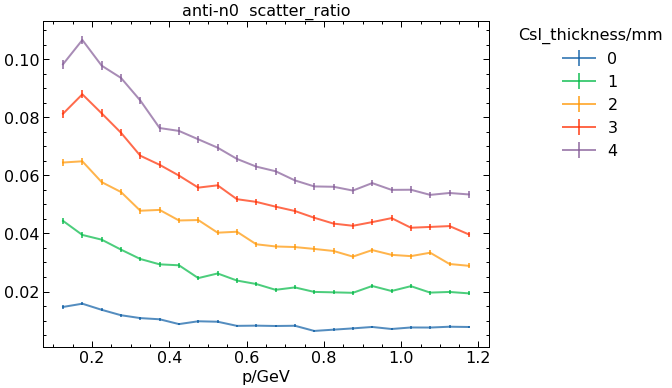

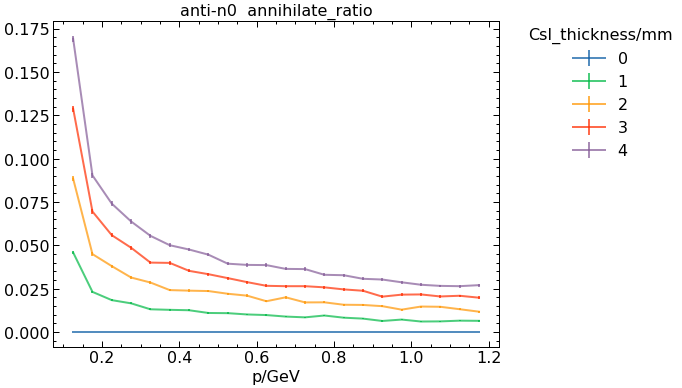

In [67]:
# 动量依赖
keys = ['scatter_ratio', 'annihilate_ratio']
nums = ['scatter_num', 'annihilate_num']
for key, num in zip(keys, nums):
    tmp = pd.DataFrame(index=np.sort(n0_csi_data.p.unique()))
    tmp_err = tmp.copy()
    tmp.index.name = 'p/GeV'
    tmp.columns.name = 'CsI_thickness'
    for thickness in np.sort(n0_csi_data.thickness.unique()):
        df = n0_csi_data[
            (n0_csi_data.thickness==thickness)
        ].groupby('p').sum()
        tmp[thickness] = df[num] / df['all']
        tmp_err[thickness] = (tmp[thickness] * (1-tmp[thickness]) / df['all']) ** 0.5

    tmp.plot(alpha=0.7, style='o-', title='{}  {}'.format('anti-n0', key), figsize=(8,6), yerr=tmp_err)
    plt.legend(loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = 0., title='CsI_thickness/mm')
    plt.show()

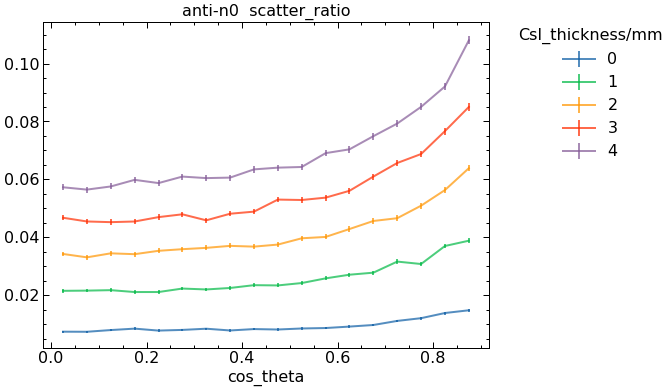

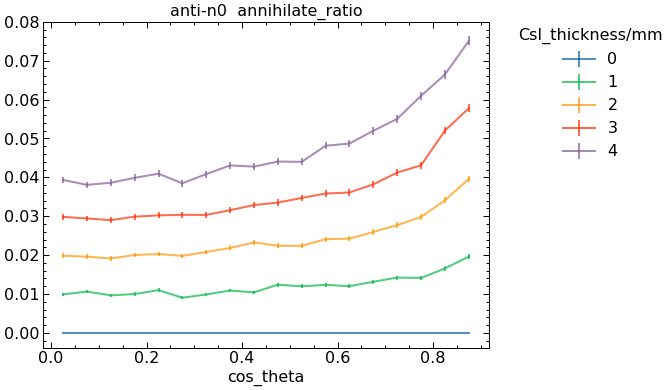

In [68]:
# theta依赖

for key, num in zip(keys, nums):
    tmp = pd.DataFrame(index=np.sort(n0_csi_data.cos_theta.unique()))
    tmp_err = tmp.copy()
    tmp.index.name = 'cos_theta'
    tmp.columns.name = 'CsI_thickness'
    for thickness in np.sort(n0_csi_data.thickness.unique()):
        df = n0_csi_data[
            (n0_csi_data.thickness==thickness)
        ].groupby('cos_theta').sum()
        tmp[thickness] = df[num] / df['all']
        tmp_err[thickness] = (tmp[thickness] * (1-tmp[thickness]) / df['all']) ** 0.5

    tmp.plot(alpha=0.7, style='o-', title='{}  {}'.format('anti-n0', key), figsize=(8,6), yerr=tmp_err)
    plt.legend(loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = 0., title='CsI_thickness/mm')
    plt.show()

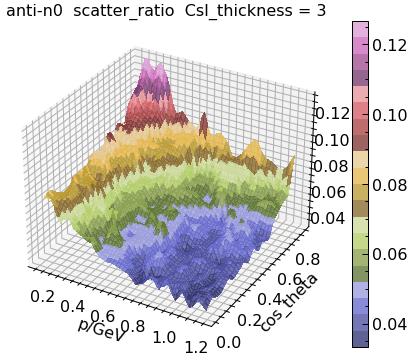

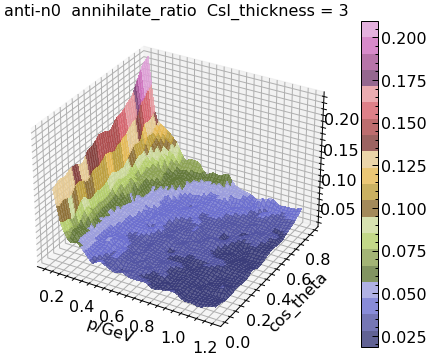

In [94]:
from scipy.interpolate import griddata

tmp = n0_csi_data[n0_csi_data.thickness==4]

tmp.scatter_ratio = tmp.apply(lambda x: x.scatter_ratio - n0_csi_data.loc[(n0_csi_data.p==x.p) & (n0_csi_data.cos_theta==x.cos_theta) & (n0_csi_data.thickness==0)].scatter_ratio.values[0], axis=1)

for key in ['scatter_ratio', 'annihilate_ratio']:

    xi=np.linspace(min(tmp.p),max(tmp.p))
    yi=np.linspace(min(tmp.cos_theta),max(tmp.cos_theta))
    xi,yi=np.meshgrid(xi,yi)
    zi=griddata(tmp[['p', 'cos_theta']],tmp[key],(xi,yi))

    fig=plt.figure()
    ax=fig.gca(projection='3d')
    surf=ax.plot_surface(xi, yi, zi,cmap='tab20b',linewidth=0,antialiased=False, alpha=0.8)
    fig.colorbar(surf)
    ax.set_title('{}  {}  CsI_thickness = 3'.format('anti-n0', key))

    ax.set_xlabel('p/GeV')
    ax.set_ylabel('cos_theta')
    # ax.set_zlabel('hit_CsI_ratio')

    plt.show()